In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
url = ("https://raw.githubusercontent.com/"
       "ipython-books/cookbook-2nd-data/"
       "master/bikes.csv")

In [0]:
df = pd.read_csv(url, index_col='Date',
                 parse_dates=True, dayfirst=True)

In [4]:
df.head(5)

,Unnamed: 1,Berri1,CSC,Mais1,Mais2,Parc,PierDup,Rachel1,Totem_Laurier
Date,,,,,,,,,
2013-01-01,00:00,0,0,1,0,6,0,1,0
2013-01-02,00:00,69,0,13,0,18,0,2,0
2013-01-03,00:00,69,2,21,6,22,1,0,0
2013-01-04,00:00,80,0,22,4,16,0,125,0
2013-01-05,00:00,52,4,19,3,12,0,97,0


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Berri1,261.0,2743.390805,2247.957848,0.0,392.0,2771.0,4767.0,6803.0
CSC,261.0,1221.858238,1070.037364,0.0,12.0,1184.0,2168.0,3330.0
Mais1,261.0,1757.590038,1458.793882,1.0,236.0,1706.0,3158.0,4716.0
Mais2,261.0,3224.130268,2589.514354,0.0,516.0,3178.0,5812.0,7684.0
Parc,261.0,1669.425287,1363.738862,6.0,222.0,1584.0,3068.0,4103.0
PierDup,261.0,1152.885057,1208.848429,0.0,12.0,818.0,2104.0,4841.0
Rachel1,261.0,3084.425287,2380.255540,0.0,451.0,3111.0,5338.0,8555.0
Totem_Laurier,261.0,1858.793103,1434.899574,0.0,340.0,2087.0,3168.0,4293.0


In [6]:
df.dtypes


Unnamed: 1       object
Berri1            int64
CSC               int64
Mais1             int64
Mais2             int64
Parc              int64
PierDup           int64
Rachel1           int64
Totem_Laurier     int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 261 entries, 2013-01-01 to 2013-09-18
Data columns (total 9 columns):
Unnamed: 1       261 non-null object
Berri1           261 non-null int64
CSC              261 non-null int64
Mais1            261 non-null int64
Mais2            261 non-null int64
Parc             261 non-null int64
PierDup          261 non-null int64
Rachel1          261 non-null int64
Totem_Laurier    261 non-null int64
dtypes: int64(8), object(1)
memory usage: 20.4+ KB


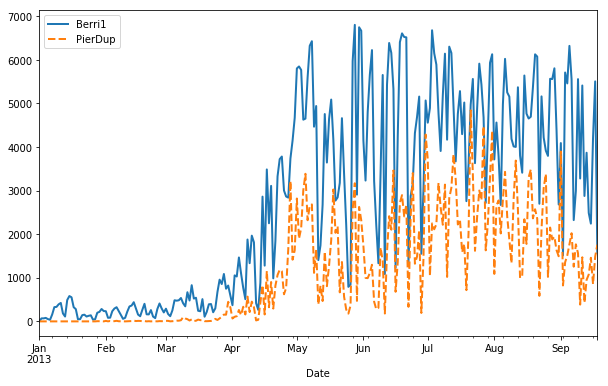

In [8]:
df[['Berri1', 'PierDup']].plot(figsize=(10, 6), style=['-', '--'], lw=2)

In [10]:
df.index.weekday_name

Index(['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday',
       'Monday', 'Tuesday', 'Wednesday', 'Thursday',
       ...
       'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday', 'Monday', 'Tuesday', 'Wednesday'],
      dtype='object', name='Date', length=261)

In [12]:
df_week = df.groupby(df.index.weekday).sum()
df_week

,Berri1,CSC,Mais1,Mais2,Parc,PierDup,Rachel1,Totem_Laurier
Date,,,,,,,,
0,106826,51646,68087,129982,69767,44500,119211,72883
1,117244,54656,76974,141217,74299,40679,123533,76559
2,120434,59604,79033,145860,80437,42564,125173,79501
3,115193,52340,76273,141424,73668,36349,120684,74540
4,105701,44252,71605,127526,64385,36850,118556,71426
5,75754,27226,45947,79743,35544,46149,97143,56438
6,74873,29181,40812,75746,37620,53812,100735,53798


(0, 151791.7)

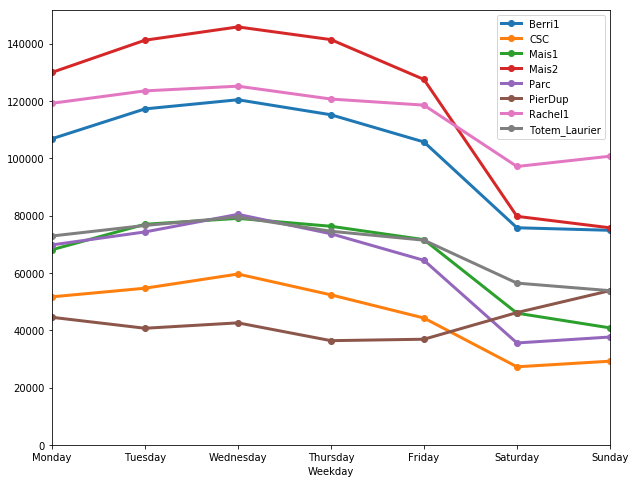

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
df_week.plot(style='-o', lw=3, ax=ax)
ax.set_xlabel('Weekday')
# We replace the labels 0, 1, 2... by the weekday names.
ax.set_xticklabels(('Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday').split(','))
ax.set_ylim(0)  # Set the bottom axis to 0.

In [16]:
from ipywidgets import interact
    
@interact
def plot(n=(1, 30)):
  fig, ax = plt.subplots(1, 1, figsize=(10, 8))
  df['Berri1'].rolling(window=n).mean().plot(ax=ax)
  ax.set_ylim(0, 7000)
  plt.show()

interactive(children=(IntSlider(value=15, description='n', max=30, min=1), Output()), _dom_classes=('widget-in…